In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from bs4 import BeautifulSoup
import xmltodict
from pprint import pprint
import os
import csv
from api_keys import z_keys
from scipy.stats import sem
from scipy import stats as st

In [2]:
ny_df = pd.read_excel("/Users/JBagga/workspace/project_test/2018NYSales.xls")

In [3]:
ny1_df = ny_df[ny_df['SALE PRICE'] > 100000]

In [4]:
z_list= [[10026,10027,10030,10037,10039],[10001,10011,10018,10019,10020,10105, 10036],\
        [10029,10035], [10010,10016,10017,10022],\
        [10012,10013,10014],\
        [10004,10005,10006,10007,10038,10280,10282],\
        [10002,10003,10009],\
        [10021,10028,10044,10065,10075,10128],\
        [10023,10024,10025,10069],[10031,10032,10033,10034,10040]]
s_neighbor =['Central Harlem','Chelsea/Clinton','East Harlem','Gramercy/Murray',\
               'Greenwich/Soho','Lower Manhattan','Lower Eastside','Upper Eastside',\
               'Upper Westside','Inwood/Washington Heights']

In [5]:
mydict2={}
for zcode,neighb in zip(z_list,s_neighbor):
    for val3 in zcode:
        mydict2[val3]=neighb
mydict2
ny1_df['Compact Neighborhood'] = ny1_df['ZIP CODE'].map(mydict2)
ny1_df

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,Compact Neighborhood
0,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,,A4,189 EAST 7TH STREET,,...,0,1,987,2183,1860,1,A4,4844809,2018-05-22,Lower Eastside
2,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,400,19,,A4,526 EAST 5TH STREET,,...,0,1,1883,5200,1900,1,A4,6100000,2018-12-03,Lower Eastside
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,379,37,,C7,133 AVENUE D,,...,2,22,3481,14588,1930,2,C7,8300000,2018-12-10,Lower Eastside
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,385,2,,C7,21-23 AVENUE B,,...,4,16,4186,10588,1900,2,C7,10350000,2018-09-07,Lower Eastside
8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,389,18,,C1,200 EAST 7TH STREET,,...,0,18,2271,10650,1910,2,C1,5000000,2018-09-05,Lower Eastside
9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,390,54,,C3,203 EAST 7TH STREET,,...,0,4,1950,5446,2001,2,C3,6250000,2018-05-09,Lower Eastside
10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,390,64,,C4,187 EAST 7TH STREET,,...,2,10,1642,5220,1910,2,C4,2400000,2018-05-18,Lower Eastside
14,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,393,23,,C7,632 EAST 11TH STREET,,...,2,35,4740,19980,1900,2,C7,17250000,2018-12-05,Lower Eastside
15,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,393,47,,C4,377 EAST 10TH,,...,0,12,2370,10715,1900,2,C4,954623,2018-06-04,Lower Eastside
20,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,398,33,,C7,28 AVENUE B,,...,1,17,1933,8699,1900,2,C7,5000000,2018-03-05,Lower Eastside


In [6]:
ny2_df = ny1_df.loc[:,['SALE PRICE','SALE DATE','Compact Neighborhood']]
ny2_df.dropna().head() # removed NaN

,SALE PRICE,SALE DATE,Compact Neighborhood
0,4844809,2018-05-22,Lower Eastside
2,6100000,2018-12-03,Lower Eastside
6,8300000,2018-12-10,Lower Eastside
7,10350000,2018-09-07,Lower Eastside
8,5000000,2018-09-05,Lower Eastside


In [7]:
ny3_df = ny2_df.groupby('Compact Neighborhood')['SALE PRICE'].\
                       agg({'Sale Count':'count','Sale Sum':'sum','Sale Avg':'mean','Sale Std Error':'sem'}).\
                        reset_index()
# ny3_df = ny3_df.drop(0)
ny3_df.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,Compact Neighborhood,Sale Count,Sale Sum,Sale Avg,Sale Std Error
0,Central Harlem,536,1119387694,2.088410e+06,1.782876e+05
1,Chelsea/Clinton,1691,14537120867,8.596760e+06,1.775788e+06
2,East Harlem,178,423397176,2.378636e+06,4.342424e+05
3,Gramercy/Murray,2044,7477966180,3.658496e+06,4.807546e+05
4,Greenwich/Soho,1007,5769843628,5.729735e+06,7.303298e+05


In [8]:
ny3_df['Compact Neighborhood'].unique()

array(['Central Harlem', 'Chelsea/Clinton', 'East Harlem',
       'Gramercy/Murray', 'Greenwich/Soho', 'Inwood/Washington Heights',
       'Lower Eastside', 'Lower Manhattan', 'Upper Eastside',
       'Upper Westside'], dtype=object)

In [9]:
# ny5_df=ny4_df[:-1] #Removing Zip 10463 as it's part of BRONX and not Manhattan
# ny5_df
# # ny5_df['Avg Sale Price']=ny5_df['Sale Sum']/ny5_df['Sale Count']
# # ny5_df

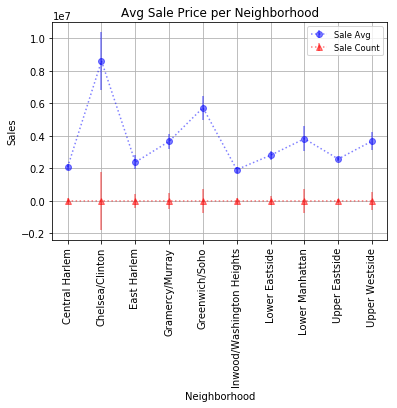

In [10]:
fig, ax = plt.subplots()

x4 = np.arange(len(ny3_df))
y4 = ny3_df['Sale Avg']
y5=ny3_df['Sale Count']
tick_locations = [value for value in x4]
ax.errorbar(x4, y4, yerr=ny3_df['Sale Std Error'], fmt="o", color="b",
            alpha=0.5, label='Sale Avg', linestyle='dotted')

ax.errorbar(x4, y5, yerr=ny3_df['Sale Std Error'], fmt="^", color="r",
            alpha=0.5, label='Sale Count', linestyle='dotted')

plt.xticks(tick_locations,ny3_df['Compact Neighborhood'],rotation='vertical')

ax.set_xlabel("Neighborhood")

ax.set_ylabel("Sales")

ax.set_title('Avg Sale Price per Neighborhood')

plt.legend(loc="best", fontsize="small", fancybox=True)
plt.grid()
# plt.figure(figsize=(35,20))
plt.savefig('AvgSalePriceNeighborlinewithSEM.png')

plt.show()

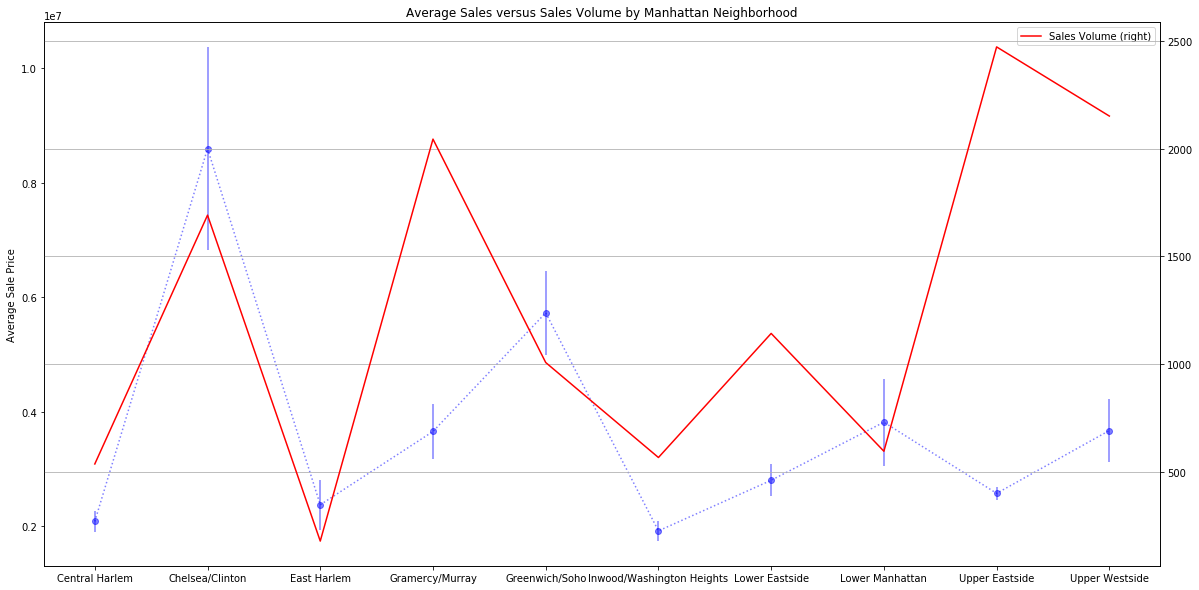

In [11]:
fig, ax = plt.subplots()

x4 = np.arange(len(ny3_df))
y4 = ny3_df['Sale Avg']
y5=ny3_df['Sale Count']
tick_locations = [value for value in x4]
ax.errorbar(x4, y4, yerr=ny3_df['Sale Std Error'], fmt="o", 
            alpha=0.5, label='Avg', color="b",linestyle='dotted')

# ax.errorbar(x4, y5, yerr=ny3_df['Sale Std Error'], fmt="^", color="r",
#             alpha=0.5, label='Sale Count', linestyle='dotted')

ny3_df['Sale Count'].plot(secondary_y=True, label="Sales Volume", legend=True,figsize=(20,10),color='r')

plt.xticks(tick_locations,ny3_df['Compact Neighborhood'],rotation='vertical')

# ax.set_xlabel("Neighborhood")

ax.set_ylabel("Average Sale Price")

ax.set_title('Average Sales versus Sales Volume by Manhattan Neighborhood')

# plt.legend(loc="best", fontsize="small", fancybox=True)
plt.grid()
# plt.figure(figsize=(35,20))
#plt.savefig('NeighborhoodSaleswithSEM.png')
plt.savefig('Average Sales versus Sales Volume by Manhattan Neighborhood.png')
plt.show()

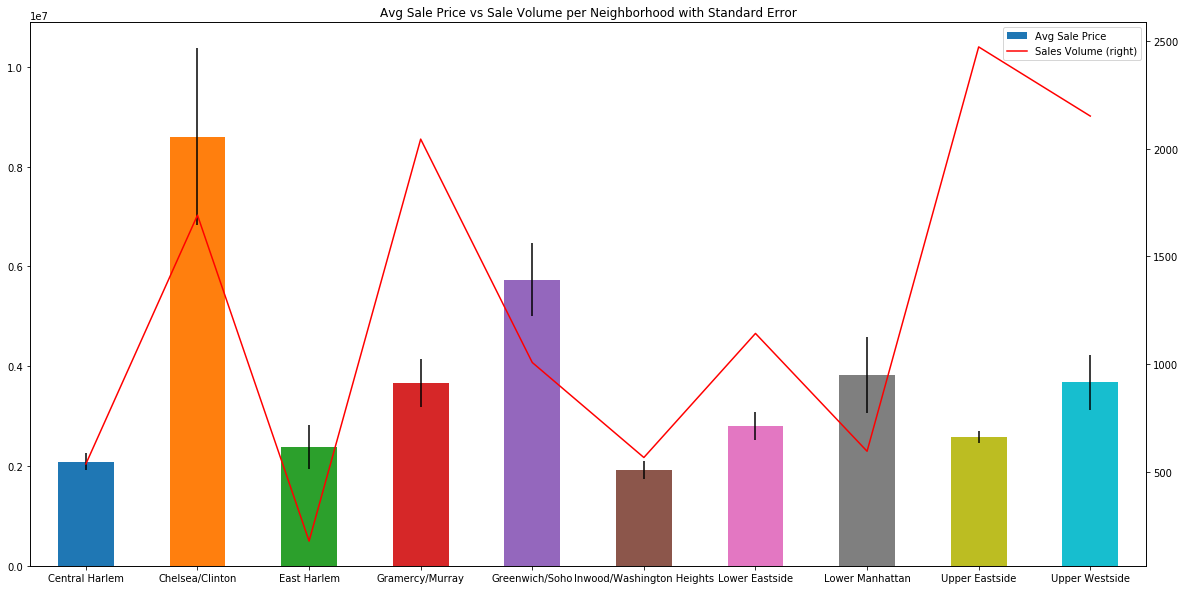

In [12]:
x6 = np.arange(0, len(ny3_df['Compact Neighborhood']))
y6 = ny3_df['Sale Avg']
y7=ny3_df['Sale Count']



ny3_df['Sale Avg'].plot(kind='bar',label="Avg Sale Price", yerr=ny3_df['Sale Std Error'],legend=True,figsize=(20,10))
ny3_df['Sale Count'].plot(secondary_y=True, label="Sales Volume", legend=True,figsize=(20,10),color='r')
# tick_locations = x6
# plt.xlabel("Neighborhood")
# plt.legend(loc="best", fontsize="large", fancybox=True)
tick_locations = x6
plt.xticks(tick_locations,ny3_df['Compact Neighborhood'],rotation=45)
plt.title('Avg Sale Price vs Sale Volume per Neighborhood with Standard Error')
plt.savefig('Avg Sale Price vs Sale Volume per Neighborhood with Standard Error.png')